## Exercise 2
The dataset is in "arff" format. You will easily understand the features and their possible values by inspecting the file. You may apply whatever transformation you like to transform the dataset in a more useful form for your task.
 
Tasks:
- Provide an overview of the dataset size, features, and distribution of feature values.
- Describe the average delays per airport/airline.
- Identify and report the most prominent rules of association between delays and point of origin AND/OR point of arrival.
- Try to predict the delay given all other features and report the appropriate performance on cross-validation.
- Identify patterns/rules regarding delays and try to explain when delays should be expected, based on these patterns.

# - Provide an overview of the dataset size, features, and distribution of feature values.

In [33]:
from scipy.io import arff
import pandas as pd
import numpy as np

In [34]:
with open('Airlines.arff', 'r') as fp:
    file_content = fp.readlines()

In [35]:
columns = []
len_attr = len('@attribute')

# get the columns
for line in file_content:
    if line.startswith('@attribute '):
        col_name = line[len_attr:].split()[0]
        columns.append(col_name)

In [36]:
columns

['DayofWeek',
 'CRSDepTime',
 'UniqueCarrier',
 'FlightNum',
 'Origin',
 'Dest',
 'ArrDelay']

In [37]:
file_content[10]

'@data\n'

In [38]:
rawdata = []
for i in range(11,len(file_content)):
    tmp = file_content[i].split(',')
    tmp = [tmp.strip('\n') for tmp in tmp]
    rawdata.append(tmp)

In [39]:
df = pd.DataFrame(rawdata, columns=columns)

In [40]:
df

,DayofWeek,CRSDepTime,UniqueCarrier,FlightNum,Origin,Dest,ArrDelay
0,5,600,UA,899.0,ORD,IAD,-3
1,5,615,DL,357.0,IAD,ATL,5
2,5,615,UA,341.0,IAD,DEN,8
3,5,625,CO,581.0,IAD,DEN,44
4,5,630,UA,902.0,CLE,IAD,-10
...,...,...,...,...,...,...,...
100156,6,2140,UA,30.0,LAX,IAD,-19
100157,6,2140,CO,896.0,LAX,IAD,-23
100158,6,2150,UA,1094.0,IAD,BDL,-14
100159,6,2155,US,394.0,PIT,IAD,9


In [41]:
df.shape

(100161, 7)

In [42]:
df.dtypes

DayofWeek        object
CRSDepTime       object
UniqueCarrier    object
FlightNum        object
Origin           object
Dest             object
ArrDelay         object
dtype: object

In [43]:
df.to_csv('transformed_dataset.csv', index=False)

In [44]:
df=pd.read_csv('transformed_dataset.csv')

In [45]:
df.head()

,DayofWeek,CRSDepTime,UniqueCarrier,FlightNum,Origin,Dest,ArrDelay
0,5,600,UA,899.0,ORD,IAD,-3
1,5,615,DL,357.0,IAD,ATL,5
2,5,615,UA,341.0,IAD,DEN,8
3,5,625,CO,581.0,IAD,DEN,44
4,5,630,UA,902.0,CLE,IAD,-10


In [46]:
df.dtypes

DayofWeek          int64
CRSDepTime         int64
UniqueCarrier     object
FlightNum        float64
Origin            object
Dest              object
ArrDelay           int64
dtype: object

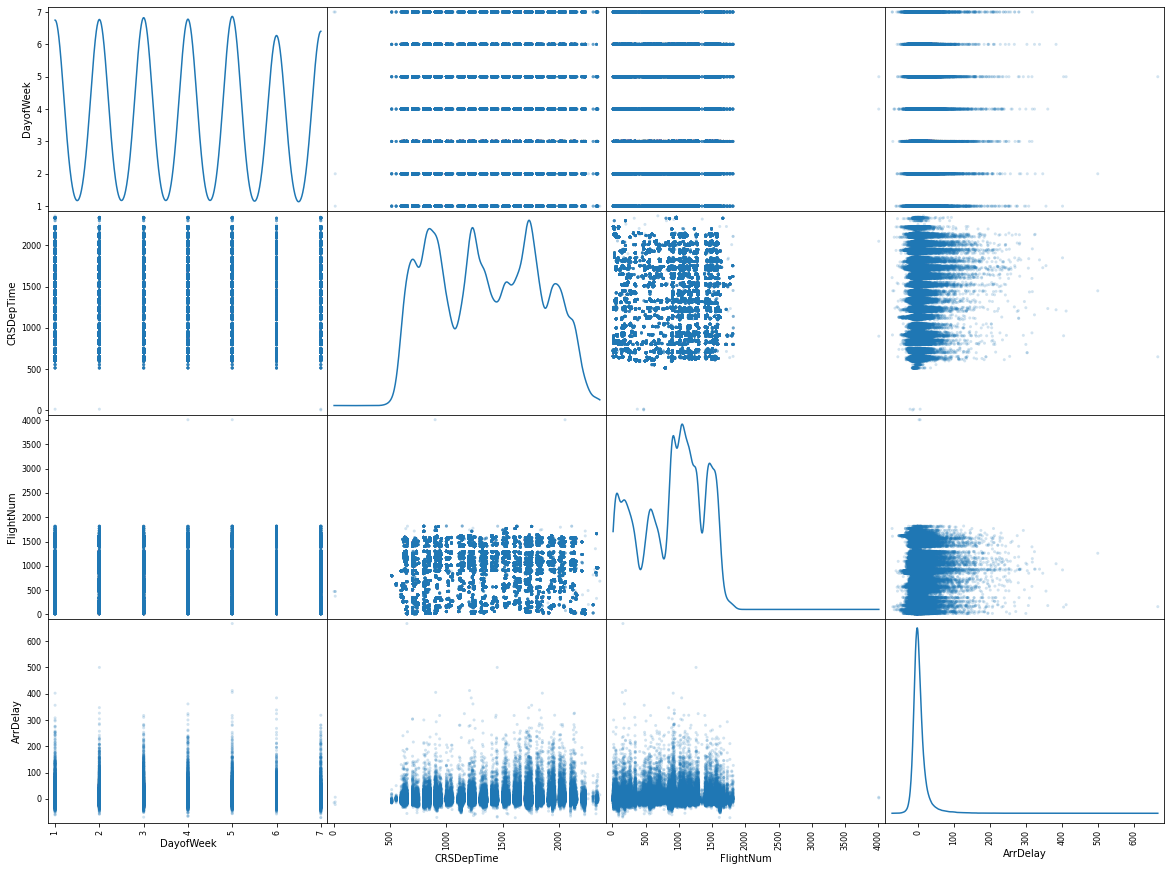

In [47]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(20, 15), diagonal='kde');

# Describe the average delays per airport/airline.

We see that arrival delay (ArrDelay) can be positive or negative number in the dataset. This means that some flights arrived earlier than expected.

In [70]:
average_ArrDelay_by_airline=df[['UniqueCarrier','ArrDelay']].groupby('UniqueCarrier').mean()
average_ArrDelay_by_airline.sort_values('ArrDelay',ascending=False)

,ArrDelay
UniqueCarrier,
'PA (1)',16.223642
EA,11.728169
US,6.246798
TW,5.179647
DL,5.118715
NW,5.004890
CO,4.919948
UA,4.569664
AA,1.908237


If we consider only the delays and not the flights that arrived earlier:

In [72]:
df_delays = df.loc[df['ArrDelay'] > 0]
average_delay_by_airline=df_delays[['UniqueCarrier','ArrDelay']].groupby('UniqueCarrier').mean()
average_delay_by_airline.sort_values('ArrDelay',ascending=False)

,ArrDelay
UniqueCarrier,
EA,29.656250
CO,25.263850
'PA (1)',24.626087
TW,20.492208
AA,17.602251
UA,17.565617
NW,16.083420
DL,15.932035
US,12.017257


Delays per origin airport

In [74]:
average_delay_by_origin_airport=df_delays[['Origin','ArrDelay']].groupby('Origin').mean()
average_delay_by_origin_airport.sort_values('ArrDelay',ascending=False)

,ArrDelay
Origin,
DCA,48.000000
JFK,38.975000
SJU,36.394118
HPN,34.638095
ORD,24.410609
DEN,23.060732
BOS,22.447967
EWR,20.637500
PBI,20.354108


Average delays per destination airport

In [75]:
average_delay_by_destination_airport=df_delays[['Origin','ArrDelay']].groupby('Origin').mean()
average_delay_by_destination_airport.sort_values('ArrDelay',ascending=False)

,ArrDelay
Origin,
DCA,48.000000
JFK,38.975000
SJU,36.394118
HPN,34.638095
ORD,24.410609
DEN,23.060732
BOS,22.447967
EWR,20.637500
PBI,20.354108


# Identify and report the most prominent rules of association between delays and point of origin AND/OR point of arrival.

In [81]:
average_delay_by_origin_and_dest=df_delays[['Origin','Dest','ArrDelay']].groupby(['Origin','Dest']).count()
average_delay_by_origin_and_dest.sort_values('ArrDelay',ascending=False)

ArrDelay
Origin Dest          
ATL    IAD       1607
ORD    IAD       1527
DEN    IAD       1449
IAD    DEN       1427
       ORD       1317
...               ...
       RIC          4
       DCA          2
       MDT          1
MDT    IAD          1
DCA    IAD          1

[115 rows x 1 columns]

# Predict the delay given all other features and report the appropriate performance on cross-validation.


In [82]:
df

,DayofWeek,CRSDepTime,UniqueCarrier,FlightNum,Origin,Dest,ArrDelay
0,5,600,UA,899.0,ORD,IAD,-3
1,5,615,DL,357.0,IAD,ATL,5
2,5,615,UA,341.0,IAD,DEN,8
3,5,625,CO,581.0,IAD,DEN,44
4,5,630,UA,902.0,CLE,IAD,-10
...,...,...,...,...,...,...,...
100156,6,2140,UA,30.0,LAX,IAD,-19
100157,6,2140,CO,896.0,LAX,IAD,-23
100158,6,2150,UA,1094.0,IAD,BDL,-14
100159,6,2155,US,394.0,PIT,IAD,9


# Identify patterns/rules regarding delays and try to explain when delays should be expected, based on these patterns.

# Material from exercise 1

In [1]:
from collections import OrderedDict
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as shc
import seaborn as sns
from sklearn import metrics, svm
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.preprocessing import normalize
from sklearn.tree import DecisionTreeClassifier

sns.set(style = "darkgrid")

In [2]:
FILE_NAME = "2016_epikrateia.xlsx"

# load the first two sheets
dfs = pd.read_excel(FILE_NAME, sheet_name=[0, 1])
data_df = dfs[0]  # type: pd.DataFrame
superclass_df = dfs[1]  # type: pd.DataFrame

data_df.head()

,ΟΝΟΜΑ ΕΓΚΛΗΜΑΤΟΣ,τελ/να,απόπειρες,εξιχνιάσεις,ημεδαποί,αλλοδαποί
0,ΑΝΘΡΩΠΟΚΤΟΝΙΕΣ,81,132,183,169,95
1,ΑΠΑΤΕΣ,3790,1189,2066,994,247
2,ΑΡΧΑΙΟΚΑΠΗΛΕΙΑ,155,19,174,161,22
3,ΒΙΑΣΜΟΙ,155,82,164,102,91
4,ΕΚΒΙΑΣΕΙΣ,135,23,89,100,55


In [3]:
data_df.tail()

,ΟΝΟΜΑ ΕΓΚΛΗΜΑΤΟΣ,τελ/να,απόπειρες,εξιχνιάσεις,ημεδαποί,αλλοδαποί
37,Ληστείες σε πρακτορεία ΟΠΑΠ,31,5,3,3,5
38,Ληστείες σούπερ μάρκετ,127,2,50,24,10
39,Ληστείες ταχυδρομικών διανομέων,4,3,1,2,0
40,"Ληστείες τραπεζών,ταχ/κών ταμιευτηρίων",14,2,12,8,0
41,Ληστείες χρηματαποστολών,21,2,1,3,0


In [4]:
superclass_df.head()

,ΟΝΟΜΑ,τελ/να,απόπειρες,εξιχνιάσεις,ημεδαποί,αλλοδαποί
0,ΛΟΙΠΑ ΕΓΚΛΗΜΑΤΑ,34805,1483,25964,21089,9573
1,ΚΛΟΠΕΣ - ΔΙΑΡΡΗΞΕΙΣ,75083,5469,14798,9990,3961
2,ΚΛΟΠΕΣ ΤΡΟΧΟΦΟΡΩΝ,26180,720,8543,1405,451
3,ΛΗΣΤΕΙΕΣ,4738,325,1582,1295,618


For the first task we have to cluster the types of crimes based on the success of the police in facing/solving them.

In order to achieve this, we have to keep the columns "τελ/να" and "απόπειρες".
The type of clustering that was chosen is Hierarchical clustering since we have few data, and we do not know the number
of clusters beforehand.

However, the decision of the number of clusters that can best depict different groups can be
chosen by observing the dendrogram.
The best choice of the number of clusters is the no. of vertical lines in the dendrogram cut by a
horizontal line that can transverse the maximum distance vertically without intersecting a
cluster.

For k- means clustering we would need to have prior knowledge about the clusters.

In [5]:
task_1_df = data_df[["τελ/να", "εξιχνιάσεις"]]

We have to normalize the data so that the scale of each variable is the same. Why is this important?

If the scale of the variables is not the same, the model might become biased towards
the variables with a higher magnitude like ΑΠΑΤΕΣ or ΕΠΑΙΤΕΙΑ.

In [6]:
data_scaled = normalize(task_1_df)
data_scaled = pd.DataFrame(data_scaled, columns=task_1_df.columns)
data_scaled.head()

,τελ/να,εξιχνιάσεις
0,0.404747,0.914429
1,0.878019,0.478625
2,0.665163,0.746699
3,0.686884,0.726767
4,0.834894,0.550411


The x-axis contains the samples and y-axis represents the distance between these samples.
The vertical line with maximum distance is the blue line and hence we can decide a threshold of 1 and cut the dendrogram


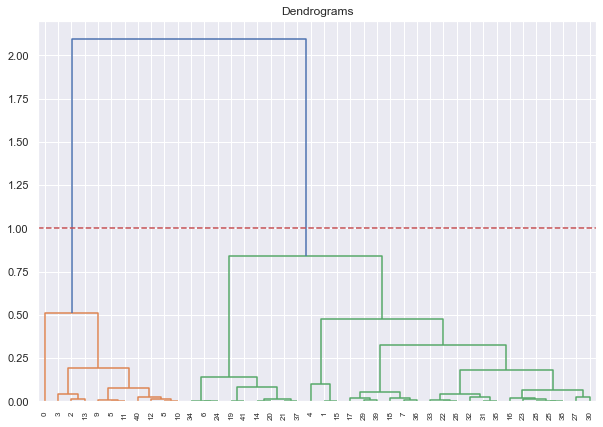

In [7]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dendrogram = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=1, color='r', linestyle='--')

We have two clusters as this line cuts the dendrogram at two points.
Let’s now apply hierarchical clustering for 2 clusters


In [8]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(data_scaled)

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64)

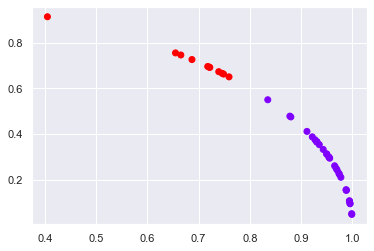

In [9]:
plt.scatter(data_scaled["τελ/να"], data_scaled["εξιχνιάσεις"], c=cluster.labels_, cmap='rainbow')

In [10]:
# Map crime names to their cluster.
crimes_names = data_df["ΟΝΟΜΑ ΕΓΚΛΗΜΑΤΟΣ"].tolist()
clusters = OrderedDict(zip(crimes_names, cluster.labels_))
pprint(clusters)

OrderedDict([('ΑΝΘΡΩΠΟΚΤΟΝΙΕΣ', 1),
             ('ΑΠΑΤΕΣ', 0),
             ('ΑΡΧΑΙΟΚΑΠΗΛΕΙΑ', 1),
             ('ΒΙΑΣΜΟΙ', 1),
             ('ΕΚΒΙΑΣΕΙΣ', 0),
             ('ΕΠΑΙΤΕΙΑ', 1),
             ('ΖΩΟΚΛΟΠΗ', 0),
             ('ΚΥΚΛΟΦΟΡΙΑ ΠΑΡΑΧΑΡΑΓΜΕΝΩΝ', 0),
             ('ΛΑΘΡΕΜΠΟΡΙΟ', 1),
             ('Ν περί ΝΑΡΚΩΤΙΚΩΝ', 1),
             ('Ν περί ΟΠΛΩΝ', 1),
             ('Ν περί ΠΝΕΥΜΑΤΙΚΗΣ ΙΔΙΟΚΤΗΣΙΑΣ', 1),
             ('ΠΛΑΣΤΟΓΡΑΦΙΑ', 1),
             ('ΣΕΞΟΥΑΛΙΚΗ ΕΚΜΕΤΑΛΛΕΥΣΗ', 1),
             ('Κλοπές - Διαρρήξεις από ιχε αυτ/τα', 0),
             ('Κλοπές - Διαρρήξεις ιερών ναών', 0),
             ('Κλοπές - Διαρρήξεις καταστημάτων', 0),
             ('Κλοπές - Διαρρήξεις λοιπές', 0),
             ('Κλοπές - Διαρρήξεις οικιών', 0),
             ('Κλοπές - Διαρρήξεις σε συγκοινωνιακά μέσα', 0),
             ('Κλοπές με αρπαγές τσαντών', 0),
             ('Κλοπές σε δημόσιο χώρο-μικροκλοπες', 0),
             ('Κλοπές Τροχοφόρων ΙΧΕ αυτ/των', 0),
             ('Κλοπές

For the second task we have to cluster the types of crimes and explain what each cluster represents. We will use the
same algorithm as before but this time we will keep all the columns except for the "ΟΝΟΜΑ ΕΓΚΛΗΜΑΤΟΣ"

In [11]:
task_2_df = data_df[["τελ/να", "απόπειρες", "εξιχνιάσεις", "ημεδαποί", "αλλοδαποί"]]
task_2_df.head()

,τελ/να,απόπειρες,εξιχνιάσεις,ημεδαποί,αλλοδαποί
0,81,132,183,169,95
1,3790,1189,2066,994,247
2,155,19,174,161,22
3,155,82,164,102,91
4,135,23,89,100,55


In [12]:
# normalize the data
data_scaled = normalize(task_2_df)
data_scaled = pd.DataFrame(data_scaled, columns=task_2_df.columns)
data_scaled.head()

,τελ/να,απόπειρες,εξιχνιάσεις,ημεδαποί,αλλοδαποί
0,0.262716,0.428129,0.593543,0.548135,0.308123
1,0.825177,0.258875,0.449819,0.216418,0.053778
2,0.544389,0.066732,0.611121,0.565463,0.077268
3,0.561027,0.296802,0.593603,0.369192,0.329377
4,0.677546,0.115434,0.446678,0.501886,0.276037


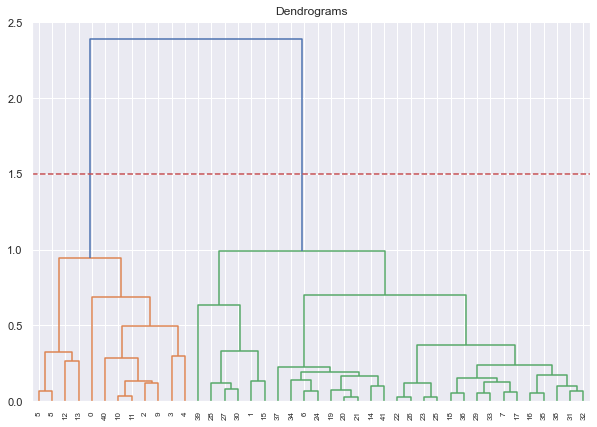

In [13]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dendrogram_2 = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=1.5, color='r', linestyle='--')

The x-axis contains the samples and y-axis represents the distance between these samples.
The vertical line with maximum distance is the blue line and hence we can decide a threshold of 1.5 and
cut the dendrogram.

We have two clusters as this line cuts the dendrogram at two points.
Let’s now apply hierarchical clustering for 2 clusters

In [14]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(data_scaled)


array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [15]:
# Map crime names to their cluster.
crimes_names = data_df["ΟΝΟΜΑ ΕΓΚΛΗΜΑΤΟΣ"].tolist()
clusters = OrderedDict(zip(crimes_names, cluster.labels_))
pprint(clusters)

OrderedDict([('ΑΝΘΡΩΠΟΚΤΟΝΙΕΣ', 1),
             ('ΑΠΑΤΕΣ', 0),
             ('ΑΡΧΑΙΟΚΑΠΗΛΕΙΑ', 1),
             ('ΒΙΑΣΜΟΙ', 1),
             ('ΕΚΒΙΑΣΕΙΣ', 1),
             ('ΕΠΑΙΤΕΙΑ', 1),
             ('ΖΩΟΚΛΟΠΗ', 0),
             ('ΚΥΚΛΟΦΟΡΙΑ ΠΑΡΑΧΑΡΑΓΜΕΝΩΝ', 0),
             ('ΛΑΘΡΕΜΠΟΡΙΟ', 1),
             ('Ν περί ΝΑΡΚΩΤΙΚΩΝ', 1),
             ('Ν περί ΟΠΛΩΝ', 1),
             ('Ν περί ΠΝΕΥΜΑΤΙΚΗΣ ΙΔΙΟΚΤΗΣΙΑΣ', 1),
             ('ΠΛΑΣΤΟΓΡΑΦΙΑ', 1),
             ('ΣΕΞΟΥΑΛΙΚΗ ΕΚΜΕΤΑΛΛΕΥΣΗ', 1),
             ('Κλοπές - Διαρρήξεις από ιχε αυτ/τα', 0),
             ('Κλοπές - Διαρρήξεις ιερών ναών', 0),
             ('Κλοπές - Διαρρήξεις καταστημάτων', 0),
             ('Κλοπές - Διαρρήξεις λοιπές', 0),
             ('Κλοπές - Διαρρήξεις οικιών', 0),
             ('Κλοπές - Διαρρήξεις σε συγκοινωνιακά μέσα', 0),
             ('Κλοπές με αρπαγές τσαντών', 0),
             ('Κλοπές σε δημόσιο χώρο-μικροκλοπες', 0),
             ('Κλοπές Τροχοφόρων ΙΧΕ αυτ/των', 0),
             ('Κλοπές

We can see that the crimes are divided into 2 clusters. In the one cluster we have all crimes that belong to 'Ληστείες'
and 'Κλοπές` as well as some other general crimes while on the other cluster we have the rest of the crimes, with some
exceptions.

In [16]:
#Add the cluster vector to the DataFrame
new_data_scaled = data_scaled.copy()
new_data_scaled["Cluster"] = list(clusters.values())
new_data_scaled.head()

,τελ/να,απόπειρες,εξιχνιάσεις,ημεδαποί,αλλοδαποί,Cluster
0,0.262716,0.428129,0.593543,0.548135,0.308123,1
1,0.825177,0.258875,0.449819,0.216418,0.053778,0
2,0.544389,0.066732,0.611121,0.565463,0.077268,1
3,0.561027,0.296802,0.593603,0.369192,0.329377,1
4,0.677546,0.115434,0.446678,0.501886,0.276037,1


Now, to visualize our data, we will use a DataFrame from using the 'PCA' algorithm.
The DataFrame will hold the results of the PCA algorithm that returns three principal components.
This DataFrame will allow us to visualize the clusters in three-dimensional space (3-D).


In [17]:
#PCA with three principal components
pca_3d = PCA(n_components=3)
PCs_3d = pd.DataFrame(pca_3d.fit_transform(new_data_scaled.drop(["Cluster"], axis=1)))
# Note that, above, we performed our PCA's on data that excluded the Cluster variable.
PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]
# We concatenate the DataFrames so that they can be used by new_data_scaled as columns.
new_data_scaled = pd.concat([new_data_scaled, PCs_3d], axis=1, join='inner')
new_data_scaled.head()

,τελ/να,απόπειρες,εξιχνιάσεις,ημεδαποί,αλλοδαποί,Cluster,PC1_3d,PC2_3d,PC3_3d
0,0.262716,0.428129,0.593543,0.548135,0.308123,1,0.715759,0.194159,0.264171
1,0.825177,0.258875,0.449819,0.216418,0.053778,0,0.044746,0.124028,0.056750
2,0.544389,0.066732,0.611121,0.565463,0.077268,1,0.454188,0.143900,-0.170143
3,0.561027,0.296802,0.593603,0.369192,0.329377,1,0.447419,0.016783,0.170545
4,0.677546,0.115434,0.446678,0.501886,0.276037,1,0.324735,0.024627,0.014678


In [18]:
# we have two clusters
cluster_0 = new_data_scaled[new_data_scaled["Cluster"] == 0]
cluster_1 = new_data_scaled[new_data_scaled["Cluster"] == 1]
cluster_0.head()

,τελ/να,απόπειρες,εξιχνιάσεις,ημεδαποί,αλλοδαποί,Cluster,PC1_3d,PC2_3d,PC3_3d
1,0.825177,0.258875,0.449819,0.216418,0.053778,0,0.044746,0.124028,0.056750
6,0.977642,0.011860,0.152492,0.138937,0.038970,0,-0.276860,-0.008637,-0.015578
7,0.952386,0.000269,0.223426,0.206467,0.020324,0,-0.197837,0.019822,-0.074446
14,0.987829,0.090794,0.106819,0.062630,0.024864,0,-0.340997,0.016688,0.070356
15,0.808811,0.199272,0.436640,0.331143,0.076192,0,0.103184,0.128670,0.002182


In [19]:
cluster_1.head()

,τελ/να,απόπειρες,εξιχνιάσεις,ημεδαποί,αλλοδαποί,Cluster,PC1_3d,PC2_3d,PC3_3d
0,0.262716,0.428129,0.593543,0.548135,0.308123,1,0.715759,0.194159,0.264171
2,0.544389,0.066732,0.611121,0.565463,0.077268,1,0.454188,0.143900,-0.170143
3,0.561027,0.296802,0.593603,0.369192,0.329377,1,0.447419,0.016783,0.170545
4,0.677546,0.115434,0.446678,0.501886,0.276037,1,0.324735,0.024627,0.014678
5,0.638091,0.000000,0.611871,0.283505,0.371588,1,0.354007,-0.223049,-0.016435


### PCA Visualizations

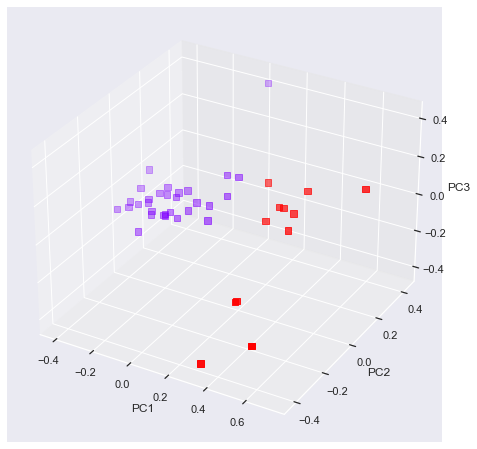

In [20]:
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection = '3d')

x = PCs_3d['PC1_3d']
y = PCs_3d['PC2_3d']
z = PCs_3d['PC2_3d']

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

ax.scatter(x, y, z, marker="s", c=new_data_scaled["Cluster"], s=40, cmap="rainbow")

From the schema above we can see that the purple cluster is more dense and has few outliers, while the red cluster is
sparser with more outliers. We are going to use DBScan in order to identify the outliers.
In order to find a suitable value for DBScan epsilon value we can calculate the distance to the nearest n points for
each point, sorting and plotting the results. Then we look to see where the change is most pronounced (think of the
angle between your arm and forearm) and select that as epsilon.

In [21]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(new_data_scaled)
distances, indices = nbrs.kneighbors(new_data_scaled)
distances

array([[0.        , 0.50094289],
       [0.        , 0.15515318],
       [0.        , 0.14586858],
       [0.        , 0.35765661],
       [0.        , 0.32413679],
       [0.        , 0.07044338],
       [0.        , 0.08071731],
       [0.        , 0.08115556],
       [0.        , 0.07044338],
       [0.        , 0.12816274],
       [0.        , 0.0402368 ],
       [0.        , 0.0402368 ],
       [0.        , 0.34106234],
       [0.        , 0.34031556],
       [0.        , 0.10371976],
       [0.        , 0.15515318],
       [0.        , 0.06911811],
       [0.        , 0.08115556],
       [0.        , 0.07721408],
       [0.        , 0.08560942],
       [0.        , 0.03361623],
       [0.        , 0.03361623],
       [0.        , 0.03158667],
       [0.        , 0.03423989],
       [0.        , 0.07384212],
       [0.        , 0.03423989],
       [0.        , 0.03158667],
       [0.        , 0.11337601],
       [0.        , 0.14677307],
       [0.        , 0.06008847],
       [0.

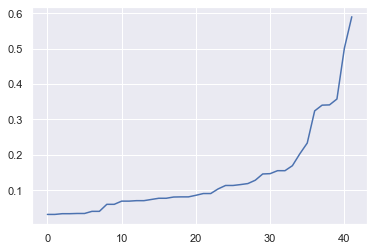

In [22]:
# Sort the distances and plot the results.
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

The optimal value for epsilon will be found at the point of maximum curvature.
From the diagram above that point is 0.35
So DBScan will be used, selecting 0.35 for eps and setting min_samples to 5.

Estimated number of clusters: 1
Estimated number of noise points: 2
Silhouette Coefficient: 0.422


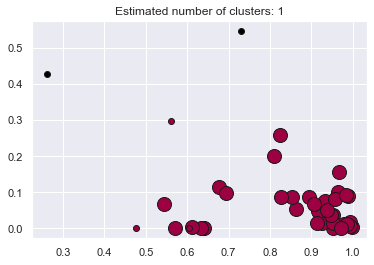

In [23]:
db = DBSCAN(eps=0.35, min_samples=5).fit(data_scaled)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data_scaled, labels))

# #############################################################################
# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.get_cmap('Spectral')(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = data_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = data_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [24]:
# Map the outliers to their labels.
clusters = OrderedDict(zip(crimes_names, labels))
outliers = [k for k in clusters.keys() if clusters[k] == -1]
outliers

['ΑΝΘΡΩΠΟΚΤΟΝΙΕΣ', 'Ληστείες ταχυδρομικών διανομέων']

The above data points are outliers. One possible explanation for this could be that the police keeps data from previous
years as well. For example, a crime could have been committed on a previous year, for example 2014, and it may have been
solved on 2016. Therefore, it will be included in the data.

For the predicting the super category of the crimes we will use the RandomForest algorithm, with GridSearch, in order to
find the best hyperparameters. In order to do that, we have to add a new column to our scaled data, called super-category
The predictions will be made based on that column.

## Functions used for classification and reporting their results

In [31]:
def accuracy_per_class(target_test, pred):
    matrix = metrics.confusion_matrix(target_test, pred)
    acc_per_class = matrix.diagonal()/matrix.sum(axis=1)
    acc_per_class_dict = {i:v for i, v in enumerate(acc_per_class)}
    return acc_per_class_dict

def general_classification_report(target_test, pred):
    """
    General Classification Report
    :param target_test: target test data
    :param pred: the prediction of the classifier
    """
    print ("Classification Report")
    print(metrics.classification_report(target_test, pred))
    print("Accuracy per class")
    pprint(accuracy_per_class(target_test, pred))
    cmrforest = metrics.confusion_matrix(target_test , pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cmrforest ,annot=True , fmt = 'd')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title('Confusion Report')


def perform_classification_with_grid_search(clf_name, data_train, data_test, target_train, target_test, cv=10):
    """
    Function that uses several classifiers with parameter tuning
    :param clf_name: Classifier name, can be Random Forest, SVM, kNN, Logistic Regression
    :param data_train: train data
    :param data_test: test data
    :param target_train: target train data
    :param target_test: target test data
    :param cv: number of folds
    :return: A dictionary with the best parameters
    """
    if clf_name =='Random Forest':
        param_grid = {
            'n_estimators': [100],
            'max_features': ['auto'],
            'max_depth' : range(1, 10),
            'criterion' :['gini', 'entropy']
        }
        clf = RandomForestClassifier(random_state=42)

    elif clf_name =='SVM':
        param_grid =  {
            'kernel': ['rbf'],
            'gamma': [1e-3, 1e-4],
            'C': [1, 10, 100, 1000]
        }
        clf = svm.SVC()

    elif clf_name =='kNN':
        param_grid = {'n_neighbors': range(1, 10)}
        clf = KNeighborsClassifier()

    elif clf_name =='Decision Tree':
        param_grid = {"criterion": ['gini', 'entropy'],
                      "max_depth": range(1, 10),
                      "min_samples_split": range(2, 10),
                      "min_samples_leaf": range(1, 5)
                      }
        clf = DecisionTreeClassifier()

    else:
        print('Provide one of the available classifiers: Random Forest, SVM, kNN, Logistic Regression')
        return

    cv_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv=cv, verbose=0)
    cv_clf.fit(data_train, target_train.values.ravel())
     # Viewing The Best Parameters
    print('Best Parameters: ', cv_clf.best_params_)
    print('Best Accuracy Score Achieved in Grid Search: ', cv_clf.best_score_)
    best_estimator = cv_clf.best_estimator_
    # Predicting using the best estimator
    best_estimator.fit(data_train, target_train.values.ravel())
    pred=best_estimator.predict(data_test)
    general_classification_report(target_test, pred)
    best_estimator.score(data_test, target_test)

In [32]:
#Split the dataset

data = []
for i in range(14):
    data.append("ΛΟΙΠΑ ΕΓΚΛΗΜΑΤΑ")
for i in range(8):
    data.append("ΚΛΟΠΕΣ - ΔΙΑΡΡΗΞΕΙΣ")
for i in range(5):
    data.append("ΚΛΟΠΕΣ ΤΡΟΧΟΦΟΡΩΝ")
for i in range(15):
    data.append("ΛΗΣΤΕΙΕΣ")

df_y = pd.DataFrame(columns=['Supercategory'], data=data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, df_y, test_size=0.3, random_state=42)
print("Train data shape: ", X_train.shape)
print("Test data shape: ", X_test.shape)

Train data shape:  (29, 5)
Test data shape:  (13, 5)


d:\pycharmprojects\data_mining_master_2020\venv\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Best Parameters:  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 100}
Best Accuracy Score Achieved in Grid Search:  0.7333333333333333
Classification Report
                     precision    recall  f1-score   support

ΚΛΟΠΕΣ - ΔΙΑΡΡΗΞΕΙΣ       1.00      0.50      0.67         2
  ΚΛΟΠΕΣ ΤΡΟΧΟΦΟΡΩΝ       1.00      0.50      0.67         2
           ΛΗΣΤΕΙΕΣ       0.57      1.00      0.73         4
    ΛΟΙΠΑ ΕΓΚΛΗΜΑΤΑ       1.00      0.80      0.89         5

           accuracy                           0.77        13
          macro avg       0.89      0.70      0.74        13
       weighted avg       0.87      0.77      0.77        13

Accuracy per class
{0: 0.5, 1: 0.5, 2: 1.0, 3: 0.8}


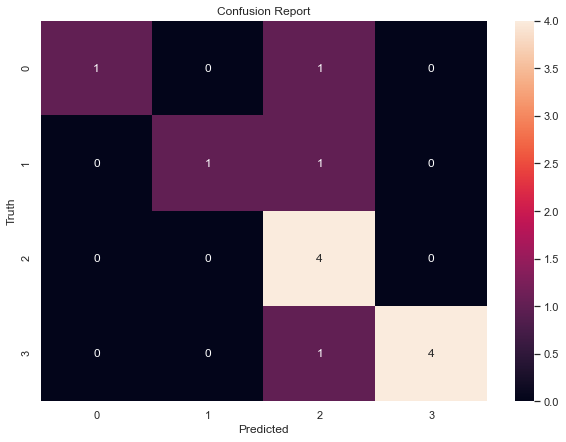

In [33]:
perform_classification_with_grid_search('Random Forest', X_train, X_test, y_train, y_test)

d:\pycharmprojects\data_mining_master_2020\venv\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
d:\pycharmprojects\data_mining_master_2020\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\pycharmprojects\data_mining_master_2020\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\pycharmprojects\data_mining_master_2020\venv\lib\site-pack

Best Parameters:  {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Best Accuracy Score Achieved in Grid Search:  0.5999999999999999
Classification Report
                     precision    recall  f1-score   support

ΚΛΟΠΕΣ - ΔΙΑΡΡΗΞΕΙΣ       0.00      0.00      0.00         2
  ΚΛΟΠΕΣ ΤΡΟΧΟΦΟΡΩΝ       0.00      0.00      0.00         2
           ΛΗΣΤΕΙΕΣ       0.50      0.80      0.62         5
    ΛΟΙΠΑ ΕΓΚΛΗΜΑΤΑ       0.80      1.00      0.89         4

           accuracy                           0.62        13
          macro avg       0.33      0.45      0.38        13
       weighted avg       0.44      0.62      0.51        13

Accuracy per class
{0: 0.0, 1: 0.0, 2: 0.8, 3: 1.0}


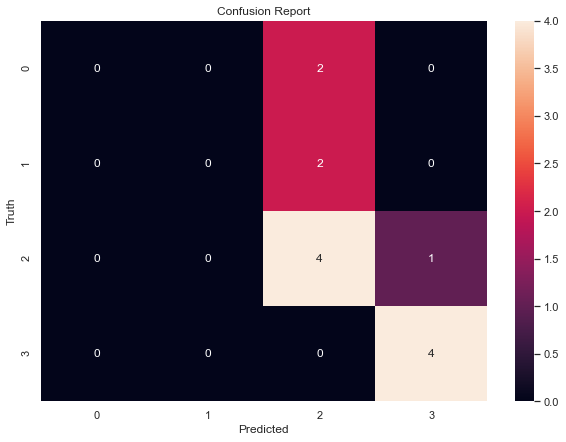

In [28]:
perform_classification_with_grid_search('SVM', X_train, X_test, y_train, y_test)

d:\pycharmprojects\data_mining_master_2020\venv\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Best Parameters:  {'n_neighbors': 3}
Best Accuracy Score Achieved in Grid Search:  0.7333333333333333
Classification Report
                     precision    recall  f1-score   support

ΚΛΟΠΕΣ - ΔΙΑΡΡΗΞΕΙΣ       0.25      0.50      0.33         2
  ΚΛΟΠΕΣ ΤΡΟΧΟΦΟΡΩΝ       1.00      0.50      0.67         2
           ΛΗΣΤΕΙΕΣ       0.67      0.40      0.50         5
    ΛΟΙΠΑ ΕΓΚΛΗΜΑΤΑ       0.80      1.00      0.89         4

           accuracy                           0.62        13
          macro avg       0.68      0.60      0.60        13
       weighted avg       0.69      0.62      0.62        13

Accuracy per class
{0: 0.5, 1: 0.5, 2: 0.4, 3: 1.0}


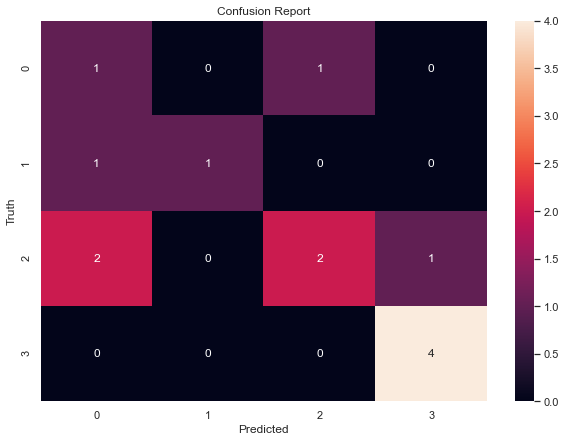

In [29]:
perform_classification_with_grid_search('kNN', X_train, X_test, y_train, y_test)

d:\pycharmprojects\data_mining_master_2020\venv\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Best Parameters:  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 3}
Best Accuracy Score Achieved in Grid Search:  0.7333333333333333
Classification Report
                     precision    recall  f1-score   support

ΚΛΟΠΕΣ - ΔΙΑΡΡΗΞΕΙΣ       0.25      0.50      0.33         2
  ΚΛΟΠΕΣ ΤΡΟΧΟΦΟΡΩΝ       1.00      0.50      0.67         2
           ΛΗΣΤΕΙΕΣ       0.67      0.40      0.50         5
    ΛΟΙΠΑ ΕΓΚΛΗΜΑΤΑ       0.80      1.00      0.89         4

           accuracy                           0.62        13
          macro avg       0.68      0.60      0.60        13
       weighted avg       0.69      0.62      0.62        13

Accuracy per class
{0: 0.5, 1: 0.5, 2: 0.4, 3: 1.0}


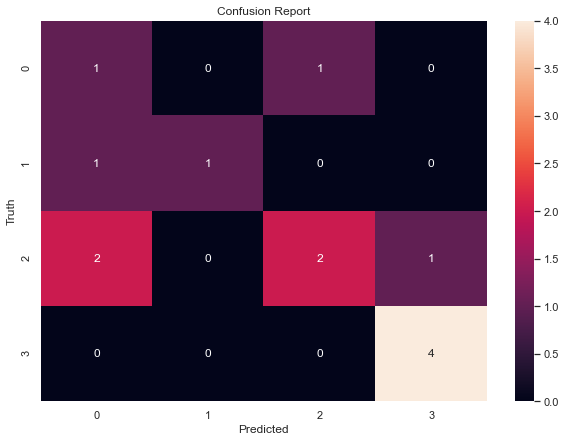

In [30]:
perform_classification_with_grid_search('Decision Tree', X_train, X_test, y_train, y_test)
